In [230]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

In [231]:
taus= np.array([50,100,200])
samps=100
Ndemes=200

In [232]:
samps=500
parr = np.zeros((len(taus),samps,Ndemes))
for i,tau in enumerate(taus):
    for ID in range(1,samps+1):
        proff = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/anc_data_sde/algo2/profile_phage*tau'+str(tau)+'*ID'+str(ID)+'*demes200*.txt')
        cnt=0

        try:
            #plt.plot(np.loadtxt(pf)[:,1])

            parr[i,ID-1]= np.loadtxt(proff[0])[:,1]
            cnt+=1

        except:
            print(tau,ID)




In [233]:
np.sum(parr[:,:,0]>0,axis=1)


array([500, 500, 500])

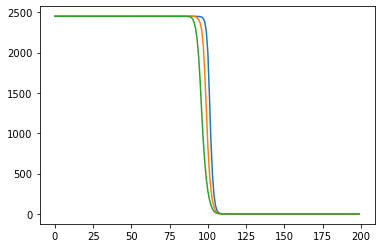

In [234]:
plt.plot(np.sum(parr.T,axis=1)/np.sum(parr[:,:,0]>0,axis=1))


In [235]:
p5arr = np.zeros((len(taus),samps))

for i,tau in enumerate(taus):
    for ID in range(1,samps+1):
        try:
            p5arr[i,ID-1] = np.argmax(np.argwhere((parr[i,ID-1]/np.max(parr[i,ID-1]) > .5))) + 1 
        except:     
            print(tau,ID)

In [236]:
cnt=0 
farr = np.zeros((len(taus),Ndemes))
for i,tau in enumerate(taus):
    marks= []
    for ID in range(1,samps+1):
        try:
            logf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/anc_data_sde/algo2/log*tau'+str(tau)+'_*ID'+str(ID)+'*demes200*.txt')



            file = logf[0]
        #for file in logf:


            f =open(file, "r")
            marks.append(f.read()[-4:-1])
        except:
            print(tau,ID)
            
    if len(marks)>0:
        
        fix_marks=[]
        for ID,m in enumerate(marks):
            if len(m)>0:
                #fix_marks.append(int(m))
                if p5arr[i,ID-1]>0:
                    fix_marks.append(int(m) - p5arr[i,ID-1])
                    #fixmarks.append(int(m))




        
        farr[i]= np.bincount(np.array(fix_marks).astype(int)+int(np.mean(p5arr[p5arr>0])) ,minlength=Ndemes)
        #farr[i]=np.bincount(np.array(fix_marks).astype(int),minlength=Ndemes)

               
    
            
            

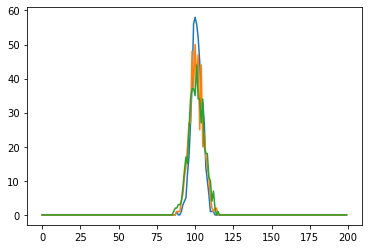

In [237]:

plt.plot(farr[0])

plt.plot(farr[1])

plt.plot(farr[2])

<ipython-input-238-f73d9996c74d>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(farr[0]/np.mean(parr[0],axis=0))
<ipython-input-238-f73d9996c74d>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(farr[0]/np.mean(parr[0],axis=0))


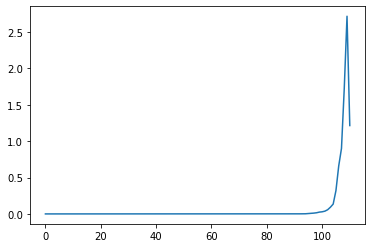

In [238]:
plt.plot(farr[0]/np.mean(parr[0],axis=0))

In [239]:
farr[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  3.,  4.,  5., 12., 17., 27., 38., 56., 58., 56., 52., 45.,
       32., 33., 27., 14., 10.,  6.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

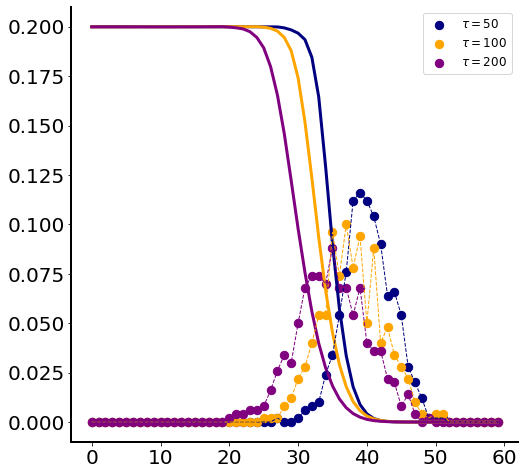

In [241]:
fig, ax= plt.subplots(figsize=(8,8))



colors = ['navy', 'orange', 'purple', 'maroon','grey']
buff= int(np.mean(p5arr[i][p5arr[i]>0])) - int(np.min(np.mean(p5arr[i][p5arr[i]>0],axis=0)))
xi=int(np.min(np.mean(p5arr[i][p5arr[i]>0],axis=0)))-30
xf=int(np.min(np.mean(p5arr[i][p5arr[i]>0],axis=0)))+30

for i,tau in enumerate(taus):
    avg_arr =np.zeros(60)
    cnt=0
    #buff= int(np.mean(p5arr[p5arr>0][i])) - int(np.min(np.mean(p5arr[p5arr>0],axis=1)))
    #xi=int(np.min(np.mean(p5arr[i][p5arr[i]>0],axis=0)))-30
    #xf=int(np.min(np.mean(p5arr[i][p5arr[i]>0],axis=0)))+30
    buff= int(np.mean(p5arr[i][p5arr[i]>0])) - int(np.min(np.mean(p5arr,axis=1)))
    for ID in range(1,samps+1):
        if not np.all(parr[i,ID-1]==0):
            cnt+=1

            avg_arr+=  parr[i,ID-11,int(p5arr[i,ID-1]-30-buff):int(p5arr[i,ID-1]+30-buff)] 
    
    ax.plot(.2*(avg_arr/cnt)/np.max(avg_arr/cnt),lw=3,c=colors[i])
#ax.plot(.6*(parr[1]/np.max(parr[1]))[20:60],c='grey')


for i in range(len(taus)):
    buff= int(np.mean(p5arr[i][p5arr[i]>0])) - int(np.min(np.mean(p5arr,axis=1)))
    xi=int(np.min(np.mean(p5arr,axis=1)))-30-buff
    xf=int(np.min(np.mean(p5arr,axis=1)))+30-buff
    ax.plot((farr[i]/np.sum(farr[i]))[xi:xf],linestyle='--',lw=1,c=colors[i])
    ax.scatter(np.arange(xf-xi),(farr[i]/np.sum(farr[i]))[xi:xf],c=colors[i],s=70,label = r'$\tau = $' + str(taus[i]))
    
    
ax.legend(fontsize=12)
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)



In [141]:
np.mean(p5arr,axis=1)

array([103.532,  99.96 ])

In [143]:
i=0

int(np.mean(p5arr[i][p5arr[i]>0])) - int(np.min(np.mean(p5arr,axis=1)))

4

<ipython-input-228-6ac479699c87>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(((farr[i]/np.sum(farr[i]))[xi:xf] )/ ((avg_arr/cnt)/np.max(avg_arr/cnt)))


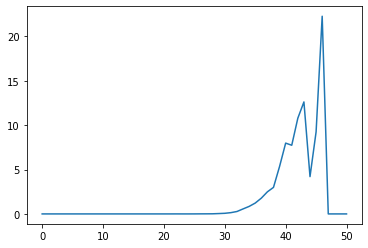

In [228]:
i=0
plt.plot(((farr[i]/np.sum(farr[i]))[xi:xf] )/ ((avg_arr/cnt)/np.max(avg_arr/cnt)))

In [118]:
int(np.mean(p5arr[i][p5arr[i]>0])) - int(np.min(np.mean(p5arr[i][p5arr[i]>0],axis=0)))

0

In [120]:
np.mean(p5arr[i][p5arr[i]>0])

140.0188679245283

In [45]:
logf

[]

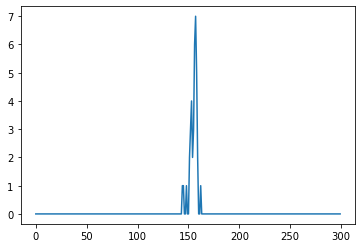

In [89]:
plt.plot(farr[0])

In [ ]:
fig, ax= plt.subplots(figsize=(8,8))


xi=40
xf=60

colors = ['navy', 'orange', 'purple', 'maroon']
for i in range(len(taus)):
    ax.plot(.6*(parr[i]/np.max(parr[i]))[xi:xf],lw=2,c=colors[i])
#ax.plot(.6*(parr[1]/np.max(parr[1]))[20:60],c='grey')


for d0  in np.argwhere(farr[3]>0):
    print(d0)
    th = farr[3][d0[0]]/np.max(farr[3])*4 +2

    ax.plot([d0[0]-40,d0[0]+1-40],.6*(parr[3]/np.max(parr[3]))[d0[0]:d0[0]+2],lw=th,c= 'maroon')

#for i in range(len(taus)):
#    ax.plot((farr[i]/500)[xi:xf],label = r'$\tau = $' + str(taus[i]),linestyle='--',lw=1,c=colors[i])
#    ax.scatter(np.arange(xf-xi),(farr[i]/500)[xi:xf],c=colors[i],s=70)
    
    
ax.legend(fontsize=12)
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


